## Threshold Tuning & Decision Analysis
Rather than relying on a default probability threshold, this notebook explores how different
thresholds affect recall, precision, and false positives to support practical decision-making.

In [12]:
# Importing the downloaded data from Kaggle
import pandas as pd
df = pd.read_csv("../data/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
# Train Test splitting and data scaling 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Tranformation
df["log_Amount"] = np.log1p(df["Amount"] + 0.01) 

# Separate features and target
X = df.drop("Class", axis=1)   # assuming 'Class' is the label
y = df["Class"]

# Train–test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=50, stratify=y
)

# Feature Selection
feature_columns_revised = ['V4','V5','V6','V9','V10','V22','V14','V16']
X_trian_selected1 = X_train[feature_columns_revised].values
X_test_selected1 = X_test[feature_columns_revised].values

# Fit scaler on training data only
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_trian_selected1)
X_test_scaled1  = scaler.transform(X_test_selected1)

# Train the model
model = LogisticRegression(class_weight='balanced', random_state =50)
model.fit(X_train_scaled1,y_train)
y_pred = model.predict(X_test_scaled1)
y_proba = model.predict_proba(X_test_scaled1)[:,1]

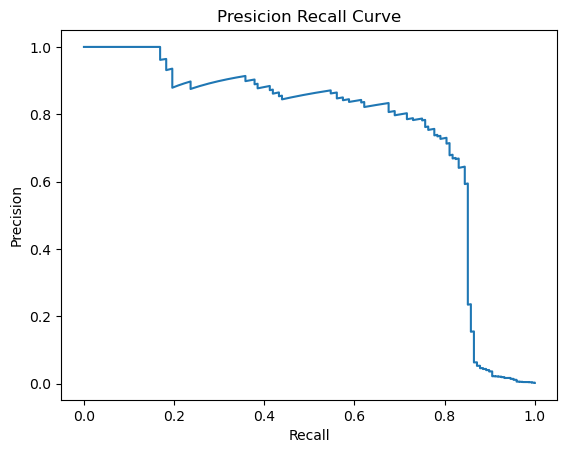

In [9]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
prec, rec, thresh = precision_recall_curve(y_test,y_prob)

# Recall -Precision Curve
plt.plot(rec,prec)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Presicion Recall Curve')
plt.show()

In [10]:
# Finding best threshold 
from sklearn.metrics import precision_score, recall_score, f1_score
thresholds = np.arange(0.001, 0.5, 0.01)
best_f1, best_thresh = 0, 0

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    f1 = f1_score(y_test, y_pred_t)
    R1 = recall_score(y_test,y_pred_t)
    P1 = precision_score(y_test,y_pred_t)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = t
        best_r1 = R1
        best_p1 = P1

print(f"✅ Best threshold: {best_thresh:.3f} (F1={best_f1:.3f}, Recall={best_r1:.3f},Precision={best_p1:.3f})")

✅ Best threshold: 0.491 (F1=0.096, Recall=0.878,Precision=0.051)


In [11]:
# Checking confusion matrix on new threshold
import numpy as np
from sklearn.metrics import confusion_matrix

threshold = 0.061

y_pred_thr = (y_proba >= threshold).astype(int)

cm = confusion_matrix(y_test,y_pred_thr)
print(cm)

print(confusion_matrix(y_test,y_pred))

[[48785 36510]
 [    2   146]]
[[82954  2341]
 [   18   130]]
